# Objetivo: 
O objetivo é construir um modelo preditivo para saber as vendas de um determinado produto numa loja específica.

# Hipóteses:
- Hipóteses sobre as lojas
-- Lojas urbanas tendem a ter vendas mais altas devido a maior renda das pessoas;
-- Densidade: lojas em áreas com mais densidade populacional tendem a vender mais devido a maior demanda;
-- Capacidade da loja: quanto maior a loja, mais capacidade de produtos e maiores as vendas, já que as pessoas podem comprar tudo de um mesmo lugar;
-- Competidores: quanto mais competidores, menores serão as vendas;
-- Marketing: se há departamento de marketing, a loja tende a atrair mais clientes e então, vender mais;
-- Localização: lojas localizadas em áreas populares tendem a ter mais clientes e com isso, mais vendas;
-- Comportamento dos clientes: se a loja consegue dispor de produtos que irão satisfazer seus clientes, mais chances de venda;
-- Ambiente: lojas com bem mantidas e administradas tendem a ter mais vendas.


- Hipóteses sobre os produtos
-- Marca: produtos de marca tendem a ter mais vendas devido a confiança dos consumidores;
-- Embalagem: boas embalagens podem atrais clientes e vender mais;
-- Utilidade: produtos diários tendem a vender mais que os de uso específico;
-- Área de exposição: quanto maior o espaço dado a um determinado produtos, mais atenção ele recebe e pode gerar mais vendas;
-- Visibilidade: qaunto mais visível o produto, maior tendencia a vender mais, produtos na frente da loja chamam mais atenção que no fundo;
-- Anúncios: quanto mais anúncio de um produto na loja mais chances de vender;
-- Promoções: produtos com ofertas e descontos vendem mais.


# Variáveis

- Item_Identifier: ID do produto
- Item_Weight: Peso do produto. Não considerada nas hipóteses.
- Item_Fat_Content: Se o produto tem gordura ou não. Ligada à hipótese de utilidade dos produtos.
- Item_Visibility: % da área de exposiação de um produto. Ligada à área de exposição.
- Item_Type: Categoria do produto. Também ligada à hipótese de utilidade dos produtos.
- Item_MRP: Lista de preço do produto. Não considerada nas hipóteses.
- Outlet_Identifier: ID da loja
- Outlet_Establishment_Year: Ano de inauguração da loja. Não considerada nas hipóteses.
- Outlet_Size: Tamanho da loja. Hipótese de capacidade da loja.
- Outlet_Location_Type: Tipo de cidade que a loja está localizada. Hipótese de localização e área da loja.
- Outlet_Type: Tipo da loja, se é mercearia ou mercado. Também ligada á hipótese de capacidade da loja.
- Item_Outlet_Sales: Vendas de um produto numa loja, variável a ser predita.


# Hipóteses e Variáveis
- Das 15 hipóteses, 9 não tem variável. 
- Das 12 variáveis, 3 não foram levantadas hipóteses.
- Teremos então 6 hipóteses que serão tratadas através das variáveis.



In [408]:
# Importando bibliotecas e banco de dados

import pandas as pd
import numpy as np


treino = pd.read_csv("treino.csv")
teste = pd.read_csv("teste.csv")

In [409]:
# Juntando o banco de dados

treino['source']='treino'
teste['source']='teste'
data = pd.concat([treino, teste],ignore_index=True)
print (treino.shape, teste.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [410]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Outlet_Establishment_Years de 1985 a 2009. Se mudarmos para a idade da loja, a variável pode ser melhor interpretada e melhor usada nas previsões.

In [411]:
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

- Aqui podemos ver que há 1559 produtos e 10 lojas. 
- Temos 16 valores únicos para Item_Type, precisamos olhar então que categorias são essas.

In [412]:
# Filtrando as variáveis categóricas
coluna_categorias = [x for x in data.dtypes.index if data.dtypes[x]=='object']

#Excludindo colunas de ID e source:
coluna_categorias = [x for x in coluna_categorias if x not in ['Item_Identifier','Outlet_Identifier','source']]

#Frequencia das categorias
for col in coluna_categorias:
    print ('\nFrequência de categorias por variável: %s' %col)
    print (data[col].value_counts())


Frequência de categorias por variável: Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequência de categorias por variável: Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequência de categorias por variável: Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Frequência de categorias por variável: Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dty

Obversações:
- Item_Fat_Content: Escritas diferentes para Low Fat que está como 'low fat' e 'LF'. Assim como 'Regular' e 'reg'.
- Outlet_Type: Supermarket Type2 e Type3 talvez possam ser combinados.

In [413]:
#Juntando Low Fat e LF em low fat

tdf=data.Item_Fat_Content.isin(['LF','Low Fat'])
tdf=tdf[tdf==True]
for i in tdf.index:
    data.at[i,'Item_Fat_Content']='low fat'

In [414]:
#Juntando reg com Regular

tdf=data.Item_Fat_Content.isin(['reg'])
tdf=tdf[tdf==True]
for i in tdf.index:
    data.at[i,'Item_Fat_Content']='Regular'

In [415]:
print (data['Item_Fat_Content'].value_counts())

low fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [416]:
# Buscando valores vazios
print(data.groupby('Outlet_Type')['Outlet_Size'].value_counts())
data.apply(lambda x: sum(x.isnull()))

Outlet_Type        Outlet_Size
Grocery Store      Small           880
Supermarket Type1  Small          3100
                   High           1553
                   Medium         1550
Supermarket Type2  Medium         1546
Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64


Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

Os valores faltantes em Outlet_Sales está ok, pois estão faltando na base de teste, e é o que pretendemos prever.
Já Item_Weight e Outlet_Size precisam ser tratados.

In [417]:
#Tratando valores vazios de Item_Weight e substituindo pela média

#Média por item
media_peso = data.pivot_table(values='Item_Weight', index='Item_Identifier')

#Achando os vazios da categoria
vazios_peso = data['Item_Weight'].isnull() 

#Substituindo valores vazios e verificando se restou algo
print ('Valores Vazios Inicio: %d'% sum(vazios_peso))
data.loc[vazios_peso,'Item_Weight'] = data.loc[vazios_peso,'Item_Identifier'].apply(lambda x: media_peso.at[x,'Item_Weight'])
print ('Valores Vazios FInal: %d'% sum(data['Item_Weight'].isnull()))


Valores Vazios Inicio: 2439
Valores Vazios FInal: 0


In [418]:
# Buscando valores vazios em Outlet_Size
print(data.groupby('Outlet_Type')['Outlet_Size'].value_counts())
data.apply(lambda x: sum(x.isnull()))

Outlet_Type        Outlet_Size
Grocery Store      Small           880
Supermarket Type1  Small          3100
                   High           1553
                   Medium         1550
Supermarket Type2  Medium         1546
Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [419]:
#Import mode function:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
print (outlet_size_mode)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [420]:
#Substituindo Outlet_Size pela moda

df=data[data.Outlet_Size.isnull()]
for k in list(df.index):
    if data.at[k,'Outlet_Type'] in ['Grocery Store','Supermarket Type1']:
        data.at[k,'Outlet_Size']='Small'
    else:
        data.at[k,'Outlet_Size']='Medium'

In [421]:
print(data.groupby('Outlet_Type')['Outlet_Size'].value_counts())
data.apply(lambda x: sum(x.isnull()))

Outlet_Type        Outlet_Size
Grocery Store      Small          1805
Supermarket Type1  Small          6191
                   High           1553
                   Medium         1550
Supermarket Type2  Medium         1546
Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [422]:
data['Item_Visibility'].describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

Item Visibility tem valores zero, o que é estranho, já que todos os itens devem estar à mostra de alguma forma.

Vamos substituir os valores zero pela média.

In [423]:
# Substituindo os zeros pela média

mean_visibility = data.pivot_table(index = "Item_Identifier",  values = "Item_Visibility")
data.loc[(data["Item_Visibility"] == 0.0), "Item_Visibility"] = data.loc[(data["Item_Visibility"] == 0.0), "Item_Identifier"].apply(lambda x : mean_visibility.at[x, "Item_Visibility"])
data['Item_Visibility'].describe()

count    14204.000000
mean         0.069710
std          0.049728
min          0.003575
25%          0.031145
50%          0.057194
75%          0.096930
max          0.328391
Name: Item_Visibility, dtype: float64

In [424]:
# Temos 16 categorias de produtos, mas o item identifier mostra que há 3 categorias maiores: FD, DR e NC, que podem ser interpretados como Food, Drink e non consumable, então iremos usar essas categorias para concentrarmos mais os dados.

#Renomeando as categorias
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [425]:
# Criando a coluna de anos de atividade a partir da coluna de ano de criação da loja

# Atualizando para 2021
data['Outlet_Years'] = 2021 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        23.169319
std          8.371664
min         12.000000
25%         17.000000
50%         22.000000
75%         34.000000
max         36.000000
Name: Outlet_Years, dtype: float64

In [426]:
# Transformando variáveis categóricas em variáveis numéricas

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Criando a nova variável numérica
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
categorias = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in categorias:
    data[i] = le.fit_transform(data[i].astype(str))

In [427]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
Outlet_1                       uint8
O

In [428]:
# Voltando a dividir as bases de teste e treino após as modificações

#Tirando as colunas que foram convertidas, para não termos infos duplicadas
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Dividindo em teste e treino
treino = data.loc[data['source']=="treino"]
teste = data.loc[data['source']=="teste"]

#Drop unnecessary columns:
teste.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
treino.drop(['source'],axis=1,inplace=True)

#Exportando arquivos modificados
#treino.to_csv("treino_modificado.csv",index=False)
#teste.to_csv("teste_modificado.csv",index=False)

In [429]:
treino.dtypes

Item_Identifier            object
Item_Weight               float64
Item_Visibility           float64
Item_MRP                  float64
Outlet_Identifier          object
Item_Outlet_Sales         float64
Outlet_Years                int64
Item_Fat_Content_0          uint8
Item_Fat_Content_1          uint8
Outlet_Location_Type_0      uint8
Outlet_Location_Type_1      uint8
Outlet_Location_Type_2      uint8
Outlet_Size_0               uint8
Outlet_Size_1               uint8
Outlet_Size_2               uint8
Outlet_Type_0               uint8
Outlet_Type_1               uint8
Outlet_Type_2               uint8
Outlet_Type_3               uint8
Item_Type_Combined_0        uint8
Item_Type_Combined_1        uint8
Item_Type_Combined_2        uint8
Outlet_0                    uint8
Outlet_1                    uint8
Outlet_2                    uint8
Outlet_3                    uint8
Outlet_4                    uint8
Outlet_5                    uint8
Outlet_6                    uint8
Outlet_7      

In [430]:
teste.dtypes


Item_Identifier            object
Item_Weight               float64
Item_Visibility           float64
Item_MRP                  float64
Outlet_Identifier          object
Outlet_Years                int64
Item_Fat_Content_0          uint8
Item_Fat_Content_1          uint8
Outlet_Location_Type_0      uint8
Outlet_Location_Type_1      uint8
Outlet_Location_Type_2      uint8
Outlet_Size_0               uint8
Outlet_Size_1               uint8
Outlet_Size_2               uint8
Outlet_Type_0               uint8
Outlet_Type_1               uint8
Outlet_Type_2               uint8
Outlet_Type_3               uint8
Item_Type_Combined_0        uint8
Item_Type_Combined_1        uint8
Item_Type_Combined_2        uint8
Outlet_0                    uint8
Outlet_1                    uint8
Outlet_2                    uint8
Outlet_3                    uint8
Outlet_4                    uint8
Outlet_5                    uint8
Outlet_6                    uint8
Outlet_7                    uint8
Outlet_8      

# Construindo o modelo

In [431]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import model_selection, metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
pd.options.mode.chained_assignment = None  # default='warn'

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = model_selection.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
     #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)


Model Report
RMSE : 1127
CV Score : Mean - 1129 | Std - 43.19 | Min - 1075 | Max - 1210


<AxesSubplot:title={'center':'Model Coefficients'}>

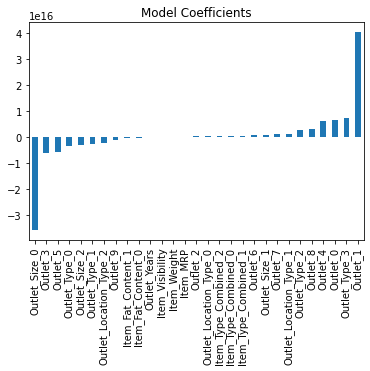

In [432]:
# Regressão Linear

predictors = [x for x in treino.columns if x not in [target]+IDcol]
alg1= LinearRegression(normalize=True)
modelfit(alg1, treino, teste, predictors, target, IDcol, 'LinearRegression.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')





Model Report
RMSE : 1128
CV Score : Mean - 1130 | Std - 44.59 | Min - 1076 | Max - 1217


<AxesSubplot:title={'center':'Model Coefficients'}>

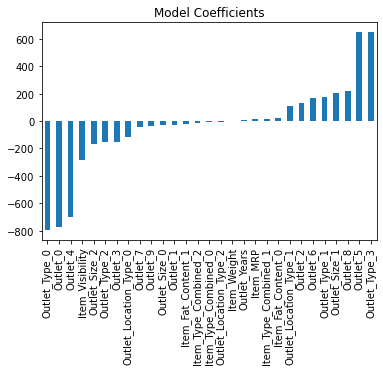

In [433]:
#Ridge

predictors = [x for x in treino.columns if x not in [target]+IDcol]
alg2 = Ridge(alpha=0.05,normalize=True)
modelfit(alg2, treino, teste, predictors, target, IDcol, 'Ridge.csv')
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 1059
CV Score : Mean - 1090 | Std - 44.26 | Min - 1002 | Max - 1174


<AxesSubplot:title={'center':'Feature Importances'}>

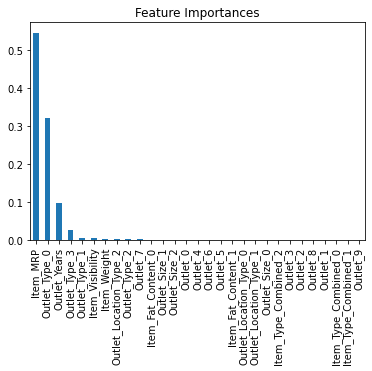

In [434]:
#Decision Tree - Primeiros parâmetros
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in treino.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, treino, teste, predictors, target, IDcol, 'DecisionTree.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 1071
CV Score : Mean - 1096 | Std - 43.3 | Min - 1027 | Max - 1172


<AxesSubplot:title={'center':'Feature Importances'}>

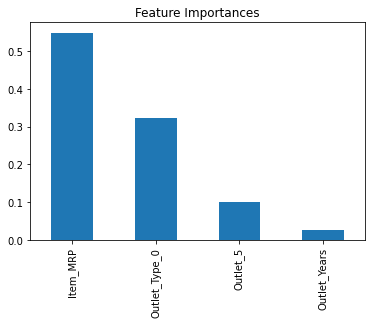

In [435]:
# Decision Tree - Parâmetros melhorados

predictors = ['Item_MRP','Outlet_Type_0','Outlet_5','Outlet_Years']
alg4 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(alg4, treino, teste, predictors, target, IDcol, 'DecisionTree_1.csv')
coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 1074
CV Score : Mean - 1084 | Std - 43.8 | Min - 1022 | Max - 1162


<AxesSubplot:title={'center':'Feature Importances'}>

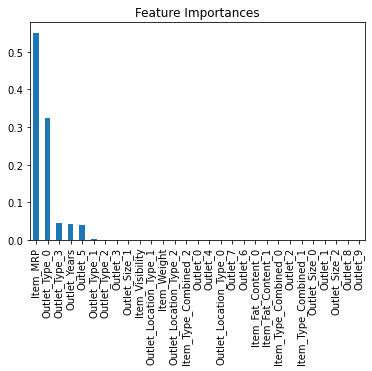

In [436]:
#Random Forest - Primeiros parâmetros

from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in treino.columns if x not in [target]+IDcol]
alg5 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
modelfit(alg5, treino, teste, predictors, target, IDcol, 'RandomForestRegressor.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')




Model Report
RMSE : 1068
CV Score : Mean - 1083 | Std - 43.17 | Min - 1021 | Max - 1158


<AxesSubplot:title={'center':'Feature Importances'}>

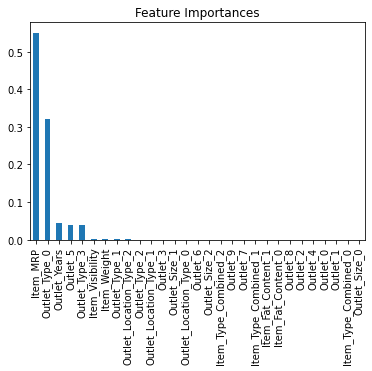

In [437]:
# Random Forest - Parâmetros melhorados

predictors = [x for x in treino.columns if x not in [target]+IDcol]
alg6 = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
modelfit(alg6, treino, teste, predictors, target, IDcol, 'RandomForestRegressor_1.csv')
coef6 = pd.Series(alg6.feature_importances_, predictors).sort_values(ascending=False)
coef6.plot(kind='bar', title='Feature Importances')

# Resumo dos resultados

Regressão Linear
- RMSE : 1127
- CV Score : Mean - 1129 | Std - 43.19 | Min - 1075 | Max - 1210
    
Ridge
- RMSE : 1128
- CV Score : Mean - 1130 | Std - 44.59 | Min - 1076 | Max - 1217
    
Decision Tree 
- RMSE : 1059
- CV Score : Mean - 1090 | Std - 44.26 | Min - 1002 | Max - 1174
    
Decision Tree 2
- RMSE : 1071
- CV Score : Mean - 1096 | Std - 43.3 | Min - 1027 | Max - 1172
    
Random Forest
- RMSE : 1073
- CV Score : Mean - 1084 | Std - 43.73 | Min - 1021 | Max - 1161

Random Forest 2
- RMSE : 1069
- CV Score : Mean - 1083 | Std - 43.41 | Min - 1020 | Max - 1158